# Imports

In [1]:
from numpy.random import seed
seed(888)
from tensorflow import random
random.set_seed(404)

In [73]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import  cifar10
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [66]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
NR_CLASSES = len(LABEL_NAMES)
IMAGE_WIDTH =32
IMAGE_HEIGHT =32
IMAGE_PIXELS = IMAGE_WIDTH*IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS

VALIDATION_SIZE =10000
SMALL_TRAIN_SIZE =1000


# Get the data

In [4]:
(x_train_all,y_train_all),(x_test,y_test) = cifar10.load_data()

In [5]:
type(x_train_all)

numpy.ndarray

# Explore the data

In [6]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

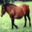

In [7]:
pic = array_to_img (x_train_all[7])
display(pic)

In [8]:
y_train_all.shape

(50000, 1)

In [9]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

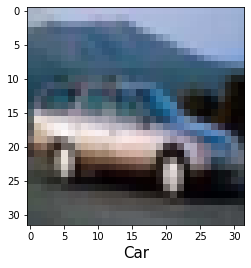

In [10]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]],fontsize=15)
plt.show()

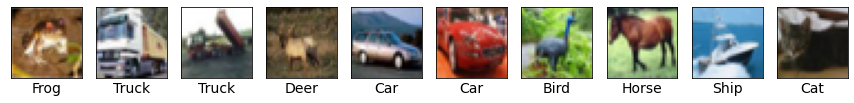

In [11]:
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.yticks([])
  plt.xticks([])
  plt.xlabel(LABEL_NAMES[y_train_all[i][0]],fontsize=14)
  plt.imshow(x_train_all[i])

In [12]:
x_train_all[0].shape

(32, 32, 3)

In [13]:
x_train_all.shape


(50000, 32, 32, 3)

In [14]:
nr_images,x,y,c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [15]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [16]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [17]:
x_train_all , x_test = x_train_all/ 255.0 , x_test/255.0

In [18]:
type(x_train_all[0][0][0][0])

numpy.float64

In [19]:
x_train_all = x_train_all.reshape(x_train_all.shape[0],TOTAL_INPUTS)

In [20]:
x_train_all.shape

(50000, 3072)

In [21]:
x_test = x_test.reshape(x_test.shape[0],TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


### Create Validation dataset

In [22]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [23]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset for illustration

In [24]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]
x_train_xs.shape

(1000, 3072)

# Define the Neural Networks using keras

In [25]:
model_1 = Sequential([
                      Dense(units=128, input_dim=TOTAL_INPUTS,activation='relu',name='m1_hidden1'),
                      Dense(units=64, activation='relu',name='m1_hidden2'),
                      Dense(units=16, activation='relu',name='m1_hidden3'),
                      Dense(units=10, activation='softmax',name='m1_output')
])
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
model_2 = Sequential()
model_2.add(Dropout(0.2,seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128,activation='relu',name = 'm2_hidden1'))
model_2.add(Dense(64,activation='relu',name = 'm2_hidden2'))
model_2.add(Dense(16,activation='relu',name = 'm2_hidden3'))
model_2.add(Dense(10,activation='softmax',name = 'm2_output'))

model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [27]:
model_3 = Sequential()
model_3.add(Dropout(0.2,seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128,activation='relu',name = 'm3_hidden1'))
model_3.add(Dropout(0.25,seed=42))
model_3.add(Dense(64,activation='relu',name = 'm3_hidden2'))
model_3.add(Dense(16,activation='relu',name = 'm3_hidden3'))
model_3.add(Dense(10,activation='softmax',name = 'm3_output'))

model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [28]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [29]:
model_1.summary() # Each neuron has a weight and a bias

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [30]:
32*32*3*128 + 128 + 128*64+64 + 64*16 +16 +16*10 +10

402810

# Tensorboard(visualising learning)

In [31]:
def get_tensorboard(model_name):
  folder_name = f'{model_name} at {strftime("%H %M")}'
  dir_paths = os.path.join(LOG_DIR,folder_name)
  try:
    os.makedirs(dir_paths)
  except OSError as err:
    print(err.strerror)
  else:
    print('Successfully created directory')
  return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [32]:
sample_per_batch = 1000


In [33]:
# %%time
# nr_epochs =150
# model_1.fit(x_train_xs,y_train_xs,batch_size=sample_per_batch,epochs= nr_epochs,
#             callbacks=[get_tensorboard('Model 1')],verbose=0,validation_data = (x_val,y_val))

In [34]:
# tensorboard --logdir=/content/tensorboard_cifar_logs press enter in terminal copy url paste it in u'll get tensorboard


In [35]:
# %%time
# nr_epochs =150
# model_2.fit(x_train_xs,y_train_xs,batch_size=sample_per_batch,epochs= nr_epochs,
#             callbacks=[get_tensorboard('Model 2')],verbose=0,validation_data = (x_val,y_val))

In [36]:
%%time
nr_epochs =100
model_1.fit(x_train,y_train,batch_size=sample_per_batch,epochs= nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')],verbose=0,validation_data = (x_val,y_val))

Successfully created directory
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Wall time: 4min 51s


In [37]:
%%time
nr_epochs =100
model_2.fit(x_train,y_train,batch_size=sample_per_batch,epochs= nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')],verbose=0,validation_data = (x_val,y_val))

Successfully created directory
Wall time: 6min 57s


In [38]:
%%time
nr_epochs =100
model_3.fit(x_train,y_train,batch_size=sample_per_batch,epochs= nr_epochs,
            callbacks=[get_tensorboard('Model 3 XL')],verbose=0,validation_data = (x_val,y_val))

Successfully created directory
Wall time: 5min 22s


# Prediction on individual images

In [39]:
x_val[0].shape

(3072,)

In [40]:
test = np.expand_dims8(x_val[0],0)

In [41]:
np.set_printoptions(precision=3)

In [42]:
model_2.predict(test)

array([[3.172e-02, 8.634e-03, 6.450e-02, 7.838e-02, 2.107e-01, 7.349e-02,
        3.891e-01, 1.410e-01, 2.419e-04, 2.219e-03]], dtype=float32)

In [43]:
model_2.predict(x_val)

array([[3.172e-02, 8.634e-03, 6.450e-02, ..., 1.410e-01, 2.419e-04,
        2.219e-03],
       [2.234e-02, 5.861e-01, 4.154e-03, ..., 4.633e-03, 2.110e-01,
        1.418e-01],
       [3.610e-02, 8.883e-02, 5.762e-03, ..., 2.677e-02, 9.938e-02,
        6.803e-01],
       ...,
       [6.405e-03, 6.687e-01, 4.889e-03, ..., 7.235e-03, 2.564e-02,
        2.710e-01],
       [4.233e-03, 8.295e-01, 4.580e-03, ..., 4.897e-03, 2.822e-02,
        9.564e-02],
       [8.084e-04, 2.770e-04, 7.038e-02, ..., 7.316e-01, 1.654e-04,
        6.353e-04]], dtype=float32)

In [44]:
model_2.predict(x_val).shape

(10000, 10)

In [45]:
np.argmax(model_2.predict(test), axis=-1) # predict classes is deprecated used this since last layer uses softmax activation

array([6], dtype=int64)

In [46]:
y_val[0]

array([6], dtype=uint8)

In [47]:
for i in range(10):
    test_img = np.expand_dims(x_val[i],axis=0)
    print(f'Actual value = {y_val[i][0]} Predicted value = {np.argmax(model_2.predict(test_img), axis=-1)[0]}')

Actual value = 6 Predicted value = 6
Actual value = 9 Predicted value = 1
Actual value = 9 Predicted value = 9
Actual value = 4 Predicted value = 6
Actual value = 1 Predicted value = 8
Actual value = 1 Predicted value = 7
Actual value = 2 Predicted value = 2
Actual value = 7 Predicted value = 7
Actual value = 8 Predicted value = 8
Actual value = 3 Predicted value = 9


# Evaluation

In [49]:
model_2.metrics_names

['loss', 'accuracy']

In [53]:
test_loss, test_accuracy = model_2.evaluate(x_test,y_test)
print(f'Test Loss is {test_loss:0.3}')
print(f'Test Accuracy is {test_accuracy:0.2%}')

313/313 [==============================] - 1s 3ms/step - loss: 1.4545 - accuracy: 0.4834
Test Loss is 1.45
Test Accuracy is 48.34%


### Confusion matrix

In [56]:
predictions = np.argmax(model_2.predict(x_test), axis=-1)

conf_matrix = confusion_matrix(y_true=y_test,y_pred=predictions)

In [57]:
conf_matrix.shape

(10, 10)

In [58]:
nr_rows = conf_matrix.shape[0]
nr_cols =  conf_matrix.shape[1]

In [59]:
conf_matrix.max()

651

In [60]:
conf_matrix.min()

5

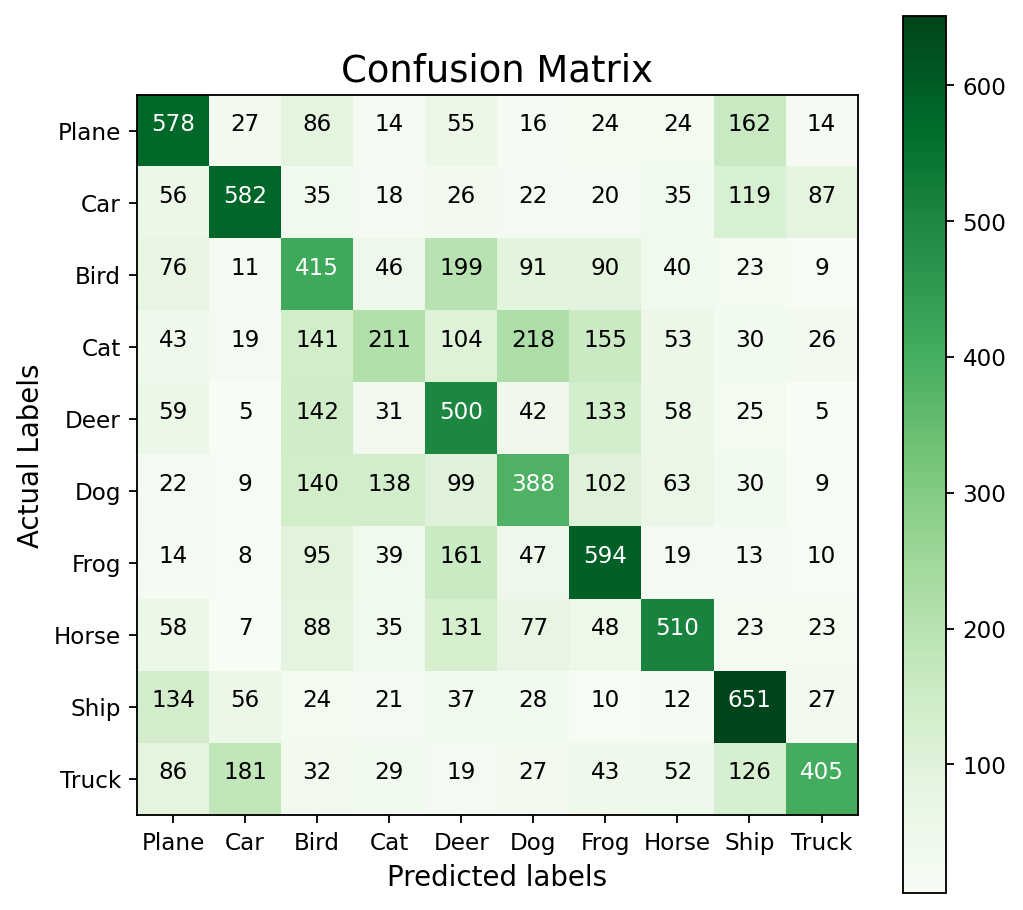

In [81]:
plt.figure(figsize=(7,7),dpi=166)
plt.imshow(conf_matrix,cmap=plt.cm.Greens)

plt.title('Confusion Matrix',fontsize=16)
plt.ylabel('Actual Labels',fontsize=12)
plt.xlabel('Predicted labels',fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks,LABEL_NAMES)
plt.xticks(tick_marks,LABEL_NAMES)

plt.colorbar()

for i,j in itertools.product(range(nr_rows),range(nr_cols)):
    plt.text(j,i,conf_matrix[i,j],horizontalalignment='center',
    color='white' if conf_matrix[i,j] >conf_matrix.max()/2 else 'black')

    
plt.show()

In [84]:
np.diag(conf_matrix)

array([578, 582, 415, 211, 500, 388, 594, 510, 651, 405], dtype=int64)

In [86]:
recall = np.diag(conf_matrix)/ np.sum(conf_matrix,axis=1)
recall

array([0.578, 0.582, 0.415, 0.211, 0.5  , 0.388, 0.594, 0.51 , 0.651,
       0.405])

In [88]:
precision = np.diag(conf_matrix)/ np.sum(conf_matrix,axis=0)
precision

array([0.513, 0.643, 0.346, 0.363, 0.376, 0.406, 0.487, 0.589, 0.542,
       0.659])

In [89]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 48.34%


In [90]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

Model 2 precision score is 49.23%


In [93]:
f1_score = 2*(avg_precision * avg_recall)/(avg_precision+avg_recall)
print(f'Model 2 f1score is {f1_score:.2%}')


Model 2 f1score is 48.78%
